<a href="https://colab.research.google.com/github/MIKBRUNO/TPNS/blob/main/lab3/lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import MSE
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# DATASET

In [ ]:
steel_industry_energy_consumption = fetch_ucirepo(id=851)

X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

In [ ]:
X

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday
...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Load_Type  35040 non-null  object
dtypes: object(1)
memory usage: 273.9+ KB


In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
label_encoder_weekstatus = LabelEncoder()
data['WeekStatus'] = label_encoder_weekstatus.fit_transform(data['WeekStatus'])

label_encoder_dayofweek = LabelEncoder()
data['Day_of_week'] = label_encoder_dayofweek.fit_transform(data['Day_of_week'])

label_encoder_loadtype = LabelEncoder()
data['Load_Type'] = label_encoder_loadtype.fit_transform(data['Load_Type'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.7 MB


In [ ]:
scaler = StandardScaler()
data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
      'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']] \
= scaler.fit_transform(
    data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
          'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']])

In [ ]:
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,1,0
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,1,0
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,1,0
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,1,0
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,1,0
...,...,...,...,...,...,...,...,...,...,...
35035,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,0,1,0
35036,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,0,1,0
35037,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,0,1,0
35038,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,0,1,0


In [ ]:
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(target.iloc[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 7
X, y = create_sequences(data.drop('Load_Type', axis=1), data['Load_Type'], time_steps)

In [ ]:
X.shape

(35033, 7, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                3000      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 5703 (22.28 KB)
Trainable params: 5703 (22.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=categorical_crossentropy,
    metrics=[
        CategoricalAccuracy(),
        MSE
    ]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, use_multiprocessing=True, workers=10)

Epoch 1/20
876/876 [==============================] - 7s 5ms/step - loss: 0.5807 - categorical_accuracy: 0.7369 - mean_squared_error: 0.1146
Epoch 2/20
876/876 [==============================] - 4s 5ms/step - loss: 0.3813 - categorical_accuracy: 0.8286 - mean_squared_error: 0.0774
Epoch 3/20
876/876 [==============================] - 5s 6ms/step - loss: 0.3444 - categorical_accuracy: 0.8456 - mean_squared_error: 0.0703
Epoch 4/20
876/876 [==============================] - 4s 5ms/step - loss: 0.3267 - categorical_accuracy: 0.8519 - mean_squared_error: 0.0673
Epoch 5/20
876/876 [==============================] - 4s 4ms/step - loss: 0.3147 - categorical_accuracy: 0.8582 - mean_squared_error: 0.0653
Epoch 6/20
876/876 [==============================] - 4s 4ms/step - loss: 0.3058 - categorical_accuracy: 0.8608 - mean_squared_error: 0.0637
Epoch 7/20
876/876 [==============================] - 5s 6ms/step - loss: 0.2981 - categorical_accuracy: 0.8618 - mean_squared_error: 0.0624
Epoch 8/20
87

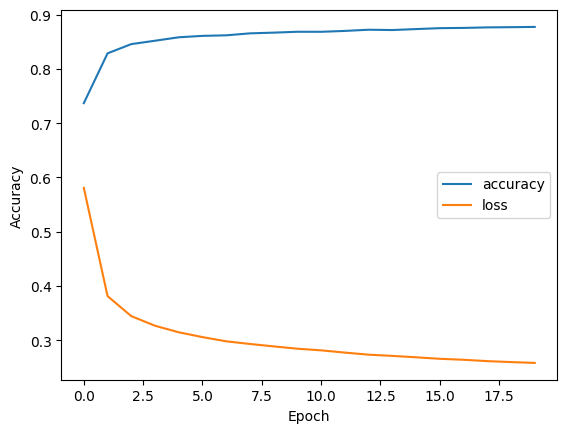

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy, test_MSE = model.evaluate(X_test, y_test)
print(f"Loss: {test_loss}\nAccuracy: {test_accuracy}\nMSE: {test_MSE}")

219/219 [==============================] - 1s 3ms/step - loss: 0.2756 - categorical_accuracy: 0.8701 - mean_squared_error: 0.0591
Loss: 0.2755563259124756
Accuracy: 0.8701298832893372
MSE: 0.05913698673248291


# GRU

In [ ]:
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                9150      
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 11853 (46.30 KB)
Trainable params: 11853 (46.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=categorical_crossentropy,
    metrics=[
        CategoricalAccuracy(),
        MSE
    ]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
876/876 [==============================] - 24s 23ms/step - loss: 0.5719 - categorical_accuracy: 0.7374 - mean_squared_error: 0.1126
Epoch 2/20
876/876 [==============================] - 13s 15ms/step - loss: 0.3756 - categorical_accuracy: 0.8419 - mean_squared_error: 0.0767
Epoch 3/20
876/876 [==============================] - 13s 14ms/step - loss: 0.3279 - categorical_accuracy: 0.8606 - mean_squared_error: 0.0668
Epoch 4/20
876/876 [==============================] - 13s 15ms/step - loss: 0.2961 - categorical_accuracy: 0.8647 - mean_squared_error: 0.0614
Epoch 5/20
876/876 [==============================] - 13s 14ms/step - loss: 0.2791 - categorical_accuracy: 0.8689 - mean_squared_error: 0.0588
Epoch 6/20
876/876 [==============================] - 13s 15ms/step - loss: 0.2678 - categorical_accuracy: 0.8729 - mean_squared_error: 0.0570
Epoch 7/20
876/876 [==============================] - 22s 25ms/step - loss: 0.2580 - categorical_accuracy: 0.8769 - mean_squared_error: 0.0553

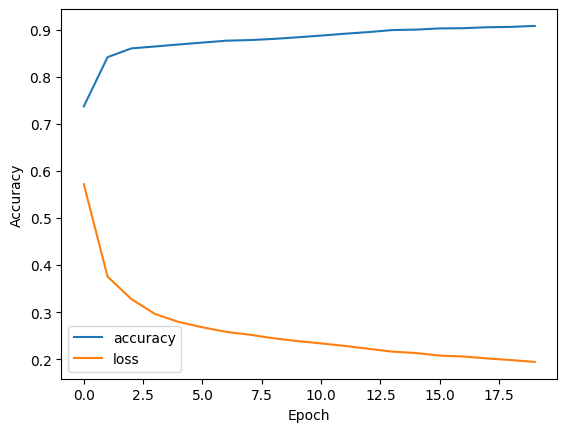

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy, test_MSE = model.evaluate(X_test, y_test)
print(f"Loss: {test_loss}\nAccuracy: {test_accuracy}\nMSE: {test_MSE}")

219/219 [==============================] - 1s 5ms/step - loss: 0.2027 - categorical_accuracy: 0.9015 - mean_squared_error: 0.0438
Loss: 0.20269805192947388
Accuracy: 0.9014848470687866
MSE: 0.043832797557115555


# LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12000     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 14703 (57.43 KB)
Trainable params: 14703 (57.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=categorical_crossentropy,
    metrics=[
        CategoricalAccuracy(),
        MSE
    ]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
876/876 [==============================] - 16s 16ms/step - loss: 0.4846 - categorical_accuracy: 0.7870 - mean_squared_error: 0.0962
Epoch 2/20
876/876 [==============================] - 13s 15ms/step - loss: 0.3154 - categorical_accuracy: 0.8591 - mean_squared_error: 0.0647
Epoch 3/20
876/876 [==============================] - 13s 15ms/step - loss: 0.2703 - categorical_accuracy: 0.8796 - mean_squared_error: 0.0563
Epoch 4/20
876/876 [==============================] - 13s 15ms/step - loss: 0.2458 - categorical_accuracy: 0.8878 - mean_squared_error: 0.0514
Epoch 5/20
876/876 [==============================] - 12s 14ms/step - loss: 0.2307 - categorical_accuracy: 0.8948 - mean_squared_error: 0.0483
Epoch 6/20
876/876 [==============================] - 12s 14ms/step - loss: 0.2189 - categorical_accuracy: 0.8996 - mean_squared_error: 0.0460
Epoch 7/20
876/876 [==============================] - 11s 13ms/step - loss: 0.2126 - categorical_accuracy: 0.9047 - mean_squared_error: 0.0445

In [ ]:
history.history

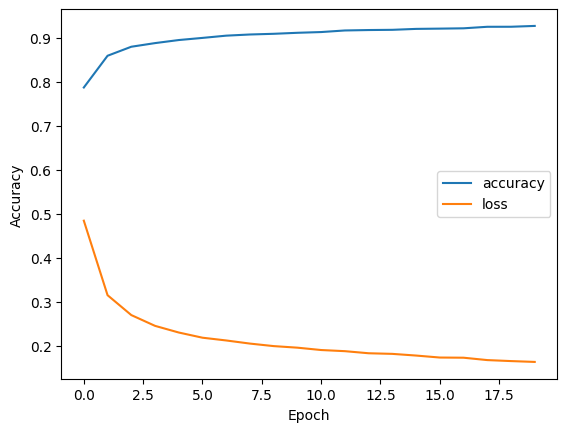

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy, test_MSE = model.evaluate(X_test, y_test)
print(f"Accuracy: {test_accuracy}\nMSE: {test_MSE}")

219/219 [==============================] - 1s 2ms/step - loss: 0.1876 - categorical_accuracy: 0.9102 - mean_squared_error: 0.0398
Accuracy: 0.9101941585540771
MSE: 0.03977576270699501
